### Bibliotecas

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [54]:
import warnings
warnings.filterwarnings('ignore')

### Dataset

In [55]:
%%time
df = pd.read_csv('database.csv')

Wall time: 1.63 s


In [56]:
df['Crime Solved'].value_counts()

Yes    448172
No     190282
Name: Crime Solved, dtype: int64

In [57]:
print(f'Número de instâncias do dataset: {df.shape[0]}\nNúmero de features: {df.shape[1]}') 

Número de instâncias do dataset: 638454
Número de features: 24


###  Objetivos

**Analisar os casos homicídio de acordo com tipo de relacionamento entre agressor e vítima**    
- Escala do problema em número de vítimas.      
- Taxas de homicídios por parceiro íntimo / familiares entre homens e mulheres.        

### Pré visualização dos dados

In [58]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

Mudando os nomes das columas, caixa baixa separado por underscore

In [60]:
def col_names(col):
    col = col.strip()
    col = col.replace(" ", "_") 
    col = col.lower()
    return col
df.columns = [col_names(c) for c in df.columns]

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   record_id              638454 non-null  int64 
 1   agency_code            638454 non-null  object
 2   agency_name            638454 non-null  object
 3   agency_type            638454 non-null  object
 4   city                   638454 non-null  object
 5   state                  638454 non-null  object
 6   year                   638454 non-null  int64 
 7   month                  638454 non-null  object
 8   incident               638454 non-null  int64 
 9   crime_type             638454 non-null  object
 10  crime_solved           638454 non-null  object
 11  victim_sex             638454 non-null  object
 12  victim_age             638454 non-null  int64 
 13  victim_race            638454 non-null  object
 14  victim_ethnicity       638454 non-null  object
 15  

In [62]:
year = df['year'].value_counts()

fig = px.bar(x=year.index, y=year, text=year, title='Homicide Count by year')

fig.update_traces(textposition='outside', marker=dict(color=year, colorscale='earth'))
fig.show()

Excluindo instâncias com valores desconhecidos (Unknown)

In [63]:
%%time
df = df.replace('Unknown', np.NAN)
df.dropna(inplace=True)

df.reindex();

Wall time: 842 ms


,record_id,agency_code,agency_name,agency_type,city,state,year,month,incident,crime_type,...,victim_ethnicity,perpetrator_sex,perpetrator_age,perpetrator_race,perpetrator_ethnicity,relationship,weapon,victim_count,perpetrator_count,record_source
44,45,AKASP00,Alaska State Police,State Police,Juneau,Alaska,1980,November,4,Manslaughter by Negligence,...,Not Hispanic,Male,26,Native American/Alaska Native,Not Hispanic,Wife,Drowning,0,0,FBI
52,53,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,1,Murder or Manslaughter,...,Not Hispanic,Male,32,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
53,54,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,2,Murder or Manslaughter,...,Not Hispanic,Female,40,White,Not Hispanic,Husband,Handgun,0,0,FBI
54,55,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,July,3,Murder or Manslaughter,...,Not Hispanic,Male,26,Black,Not Hispanic,Acquaintance,Handgun,0,1,FBI
58,59,AL00100,Jefferson,Sheriff,Jefferson,Alabama,1980,September,41,Murder or Manslaughter,...,Not Hispanic,Male,22,White,Not Hispanic,Father,Rifle,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638441,638442,WY00300,Campbell County,Sheriff,Campbell,Wyoming,2014,February,1,Murder or Manslaughter,...,Not Hispanic,Male,15,White,Not Hispanic,Acquaintance,Handgun,0,0,FBI
638442,638443,WY01100,Laramie County,Sheriff,Laramie,Wyoming,2014,July,1,Murder or Manslaughter,...,Not Hispanic,Male,61,White,Not Hispanic,Wife,Shotgun,0,0,FBI
638446,638447,WY01300,Natrona County,Sheriff,Natrona,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Male,48,White,Not Hispanic,Mother,Handgun,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [64]:
df['victim_sex'].replace(['Female', 'Male'], ['F', 'M'], inplace=True)
df['perpetrator_sex'].replace(['Female', 'Male'], ['F', 'M'], inplace=True);

Ajustando tipos dos dados

In [65]:
def cat_type(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].astype('category')
    return df

In [66]:
(df.values==' ').sum()

0

In [67]:
df = cat_type(df)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155851 entries, 44 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   record_id              155851 non-null  int64   
 1   agency_code            155851 non-null  category
 2   agency_name            155851 non-null  category
 3   agency_type            155851 non-null  category
 4   city                   155851 non-null  category
 5   state                  155851 non-null  category
 6   year                   155851 non-null  int64   
 7   month                  155851 non-null  category
 8   incident               155851 non-null  int64   
 9   crime_type             155851 non-null  category
 10  crime_solved           155851 non-null  category
 11  victim_sex             155851 non-null  category
 12  victim_age             155851 non-null  int64   
 13  victim_race            155851 non-null  category
 14  victim_ethnicity   

In [69]:
df['perpetrator_age'] = pd.to_numeric(df['perpetrator_age'])

Agrupando grupos similares do tipo de relacionamento das vítimas e acusados

In [99]:
df['relationship_group'] = 'nan'

df.loc[(df['relationship'] == 'Father') | (df['relationship'] == 'Mother') | (df['relationship'] == 'Son') | (df['relationship'] == 'Daughter') | (df['relationship'] == 'Sister') | (df['relationship'] == 'Brother') | (df['relationship'] == 'Family'), 'relationship_group'] = '1° grau' 
df.loc[(df['relationship'] == 'In-Law') | (df['relationship'] == 'Common-Law Husband') | (df['relationship'] == 'Common-Law Wife'), 'relationship_group'] = 'Parentes Afins'                                                                 
df.loc[(df['relationship'] == 'Stepson') | (df['relationship'] == 'Stepdaughter') | (df['relationship'] == 'Stepfather') | (df['relationship'] == 'Stepmother'), 'relationship_group'] = 'Parentes Afins' 
df.loc[(df['relationship'] == 'Boyfriend') | (df['relationship'] == 'Girlfriend') | (df['relationship'] == 'Boyfriend/Girlfriend') , 'relationship_group'] = 'Namorados' 
df.loc[(df['relationship'] == 'Employer') | (df['relationship'] == 'Employee'), 'relationship_group'] = 'Empregador/Empregado' 
df.loc[(df['relationship'] == 'Ex-Husband') | (df['relationship'] == 'Ex-Wife'), 'relationship_group'] = 'Ex-cônjuge' 
df.loc[(df['relationship'] == 'Acquaintance'), 'relationship_group'] = 'Conhecido'
df.loc[(df['relationship'] == 'Neighbor'), 'relationship_group'] = 'Vizinho'
df.loc[(df['relationship'] == 'Stranger'), 'relationship_group'] = 'Estranho'
df.loc[(df['relationship'] == 'Friend'), 'relationship_group'] = 'Amigo'
df.loc[(df['relationship'] == 'Husband') | (df['relationship'] == 'Wife'), 'relationship_group'] = 'Cônjuge' 

df['relationship_group'] = df['relationship_group'].astype('category')


Agrupando tipos de armas similares

In [100]:
gun_list = ['Handgun' ,'Firearm', 'Shotgun','Rifle', 'Gun']
suff = ['Suffocation', 'Strangulation']
def f(x):
    if x in gun_list:
        x = 'Firegun'
    elif x in suff:
        x = 'Choking'
    return x

df['weapon_type'] = df['weapon'].apply(f)
df['weapon_type'] = df['weapon_type'].astype('category') 

Selecionando algumas variáveis para a análise

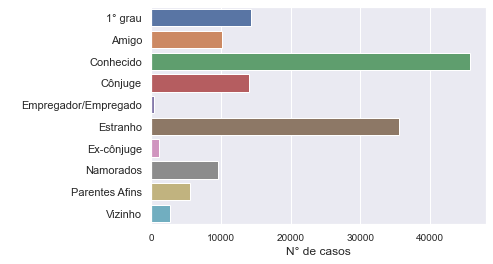

In [138]:
sns.countplot(y=df['relationship_group'])
plt.ylabel(' ', fontsize=12)
plt.xlabel('N° de casos', fontsize=12)
plt.xticks(fontsize = 10)
plt.title('Relacionamento do agressor com a vítima', fontsize=15)
plt.savefig('relation.png',bbox_inches = 'tight', dpi=200)
plt.show()


Busca por outliers

In [73]:
df[['perpetrator_age', 'victim_age']].max(axis = 0)

perpetrator_age     99
victim_age         998
dtype: int64

In [74]:
# excluindo as amostras iguais a zero e os outlier's
df = df.loc[(df['perpetrator_age'] >= 18) & (df['perpetrator_age'] <= 90)]
df = df.loc[(df['victim_age'] <= 90)]
df.shape

(139338, 26)

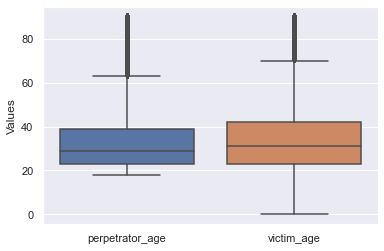

In [75]:
#boxplot = df.boxplot(column=['Perpetrator Age', 'Victim Age'])
#data = df['perpetrator_age', 'victim_age']
boxplot = sns.boxplot(data=df[['perpetrator_age', 'victim_age']]);
boxplot.set_ylabel('Values');

In [76]:
prep_sex = df['perpetrator_sex'].value_counts()
vic_sex = df['victim_sex'].value_counts()

fig = px.pie(names=prep_sex.index, values=prep_sex, title="Sexo do acusado")

fig.update_traces(textinfo='percent', insidetextorientation='radial', legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set2))
fig.show()

fig = px.pie(names=vic_sex.index, values=vic_sex, title="Sexo da vítima")

fig.update_traces(textinfo='percent', insidetextorientation='radial',
            legendgroup='show', 
            marker = dict(colors=px.colors.qualitative.Set2))

fig.show()

Média de idade das vítimas e acusados de acordo com o relacionamento

In [77]:
df[['relationship_group', 'victim_age', 'perpetrator_age']].groupby(["relationship_group"]).mean()

,victim_age,perpetrator_age
relationship_group,,
1° grau,29.049139,32.800376
Amigo,32.723676,31.619661
Conhecido,32.902979,31.223393
Cônjuge,41.091837,42.785903
Empregador/Empregado,44.610526,36.952632
Estranho,32.867547,29.295661
Ex-cônjuge,37.506539,39.625981
Namorado/Namorada,33.501038,33.735569
Parentes Afins,35.187636,36.014727


### Alguns Gráficos   
Por sexo das vítimas

In [78]:
df['relationship_group'].value_counts()

Conhecido               45825
Estranho                35605
1° grau                 14347
Cônjuge                 14003
Amigo                   10162
Namorado/Namorada        9632
Parentes Afins           5500
Vizinho                  2737
Ex-cônjuge               1147
Empregador/Empregado      380
Name: relationship_group, dtype: int64

In [102]:
# index of male and female victims
male_vic_idx = df[df['victim_sex']=='M'].index
female_vic_idx = df[df['victim_sex']=='F'].index

# dataframe were victims are males or females
male_df = df.loc[male_vic_idx]
female_df = df.loc[female_vic_idx]

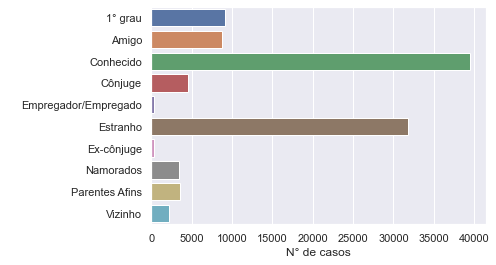

In [140]:
sns.countplot(y=male_df['relationship_group'])
plt.xlabel('N° de casos', fontsize=12), plt.ylabel(' ')
plt.savefig('male_vict.png',bbox_inches = 'tight', dpi=200)
plt.show();
#plt.title('Tipo de Relacionamento do agressor com vítimas do sexo masculino', fontsize=15)

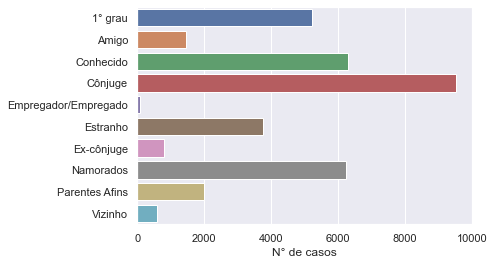

In [141]:
sns.countplot(y=female_df['relationship_group'])
plt.xlabel('N° de casos', fontsize=12), plt.ylabel('')
plt.savefig('female_vict.png',bbox_inches = 'tight', dpi=200)
#plt.title('Tipo de Relacionamento do agressor com vítimas do sexo feminino', fontsize=15)
plt.show();

Gráficos por sexos dos acusados

In [104]:
male_perp_idx = df[df['perpetrator_sex']=='M'].index
female_perp_idx = df[df['perpetrator_sex']=='F'].index

male_perp_df = df.loc[male_perp_idx]
female_perp_df = df.loc[female_perp_idx]

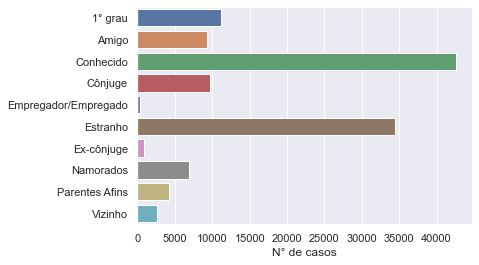

In [147]:
sns.countplot(y=male_perp_df['relationship_group']), plt.xlabel('N° de casos', fontsize=12), plt.ylabel('')
plt.title('Tipo de relacionamento dos agressores do sexo masculino com as vítimas', fontsize=15)
plt.savefig('male_perp.png',bbox_inches = 'tight', dpi=200)
plt.show();

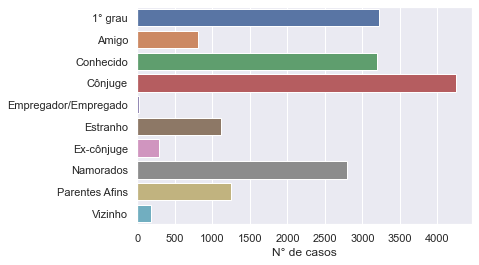

In [148]:
sns.countplot(y=female_perp_df['relationship_group']), plt.xlabel('N° de casos', fontsize=12), plt.ylabel('')
plt.title('Tipo de relacionamento dos agressores do sexo feminino com as vítimas', fontsize=15)
plt.savefig('female_perp.png',bbox_inches = 'tight', dpi=200)
plt.show();

In [151]:
male_perp_df['relationship_group'].value_counts(normalize=True)

Conhecido               0.348822
Estranho                0.282163
1° grau                 0.091000
Cônjuge                 0.079791
Amigo                   0.076591
Namorados               0.055948
Parentes Afins          0.034757
Vizinho                 0.020954
Ex-cônjuge              0.007061
Empregador/Empregado    0.002913
Name: relationship_group, dtype: float64

In [152]:
female_perp_df['relationship_group'].value_counts(normalize=True)

Cônjuge                 0.248335
1° grau                 0.188398
Conhecido               0.186470
Namorados               0.163220
Parentes Afins          0.073139
Estranho                0.065370
Amigo                   0.046793
Ex-cônjuge              0.016591
Vizinho                 0.010282
Empregador/Empregado    0.001402
Name: relationship_group, dtype: float64

Os acusados de sexo feminino tendem a ter vítimas mais próximos do grupo familar.

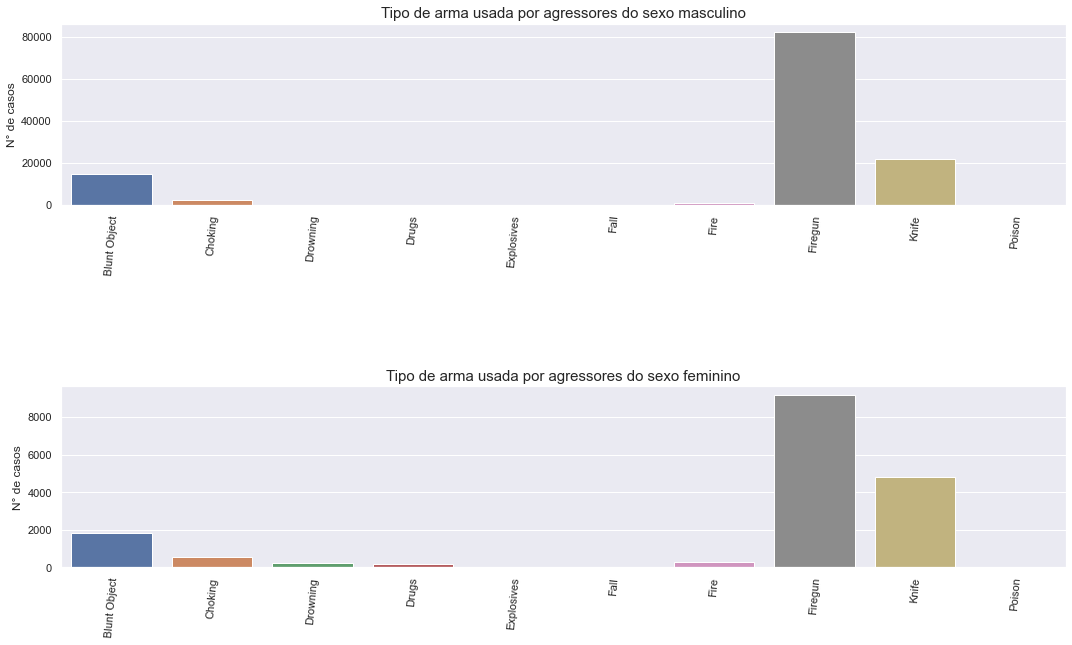

In [83]:
plt.figure(figsize=(18,10))
plt.subplot(2,1,1)
sns.countplot(x=male_perp_df['weapon_type']), plt.ylabel('N° de casos', fontsize=12), plt.xlabel('')
plt.xticks(rotation=85)
plt.title('Tipo de arma usada por agressores do sexo masculino', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(x=female_perp_df['weapon_type']), plt.ylabel('N° de casos', fontsize=12), plt.xlabel('')
plt.xticks(rotation=85)
plt.title('Tipo de arma usada por agressores do sexo feminino', fontsize=15)
plt.subplots_adjust(hspace=1)
plt.show()

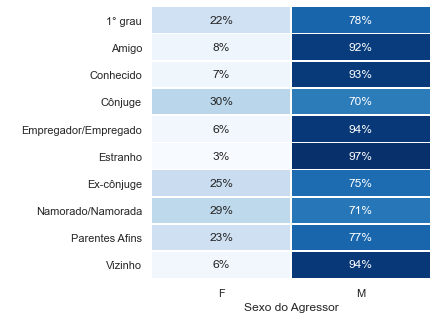

In [86]:
def descriptionHeatmap(df1, df2, titleName):
    plt.figure(figsize=(5,5))
    sns.set()
    ax = sns.heatmap(pd.crosstab(df1,df2).apply(lambda r: r/r.sum(), axis=1), 
                  annot=True, fmt=".0%", linewidths=.5,cmap='Blues', cbar = False)
    ax.set_title(titleName, fontsize = 13)
    ax.set_ylabel(' ')
    ax.set_xlabel('Sexo do Agressor', fontsize=12)
    
descriptionHeatmap(df1 = df.relationship_group, df2 = df.perpetrator_sex, titleName = '')

## Testes estatístico - $\chi^2$

Estamos interessados em descobrir se o sexo do acusado tende a alterar de acordo com tipo de relacionamento com a vítima.

$ H_0 : $ O sexo do acusado não se altera.   
$ H_\alpha : $ O sexo se altera. 

In [33]:
test_data = pd.crosstab(df['relationship_group'], df['perpetrator_sex'])

In [34]:
test_data.head(10)

perpetrator_sex,F,M
relationship_group,,
1° grau,3225,11122
Amigo,801,9361
Conhecido,3192,42633
Cônjuge,4251,9752
Empregador/Empregado,24,356
Estranho,1119,34486
Ex-cônjuge,284,863
Namorado/Namorada,2794,6838
Parentes Afins,1252,4248


In [35]:
stat, p, dof, expected = chi2_contingency(test_data.values)

prob = 0.95
critical = chi2.ppf(prob, dof)
#print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Rejeita a hipótese nula.')
else:
    print('Não rejeita a hipótese nula.')

Rejeita a hipótese nula.


Para os nossos dados há evidência estatítica a um nível de significância de 5% que existe preferência por acusados/acusadas dado ao grau de seu relacionamento com a vítima.

## Modelo de Classificação - Árvore de Decisão

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [37]:
data = df.copy()

In [38]:
column = ['crime_type', 'victim_sex', 'victim_race', 'victim_age', 'perpetrator_age', 'perpetrator_race', 'weapon_type', 'relationship_group']

In [39]:
le = LabelEncoder()
X_data = data[column].apply(le.fit_transform)

In [40]:
y = le.fit_transform(data['perpetrator_sex'])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_data.values, y, test_size = 0.3 ,random_state=123)
# model
dtc = DecisionTreeClassifier(random_state=123)

pipe = Pipeline([('dtc', dtc)])

In [42]:
param_grid={"dtc__criterion":['gini', 'entropy'],
            "dtc__splitter":["best","random"],
            "dtc__max_depth" : [1,3,5,7,9],
            "dtc__min_samples_leaf":[1,2,3,4,5],
            "dtc__max_features":["auto","log2","sqrt",None],
            "dtc__max_leaf_nodes":[None,10,20,30,40,50,60,70] }



search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.927):
{'dtc__criterion': 'gini', 'dtc__max_depth': 7, 'dtc__max_features': None, 'dtc__max_leaf_nodes': 50, 'dtc__min_samples_leaf': 3, 'dtc__splitter': 'best'}


In [43]:
Model = DecisionTreeClassifier(criterion = search.best_params_['dtc__criterion'], 
                               splitter = search.best_params_['dtc__splitter'], 
                               max_depth = search.best_params_['dtc__max_depth'], 
                               min_samples_leaf = search.best_params_['dtc__min_samples_leaf'],
                               max_leaf_nodes = search.best_params_['dtc__max_leaf_nodes'], 
                               max_features = search.best_params_['dtc__max_features'], random_state=123)

In [44]:
pipe = Pipeline([('Model', Model)])

In [45]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.927539352184106

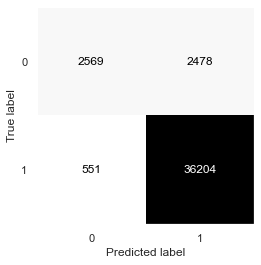

In [46]:
plot_confusion_matrix(pipe, X_test, y_test, colorbar=False, cmap = 'Greys')
plt.grid(None)

In [48]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pipe.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.82      0.51      0.63      5047
           1       0.94      0.99      0.96     36755

    accuracy                           0.93     41802
   macro avg       0.88      0.75      0.79     41802
weighted avg       0.92      0.93      0.92     41802

